Univerzitet u Sarajevu
<br> Elektrotehnički fakultet
#### **Predmet: Multimedijalni Sistemi**

# Laboratorijska vježba 08: DCT i bazne funkcije

---

Za izradu laboratorijske vježbe treba koristiti odgovarajuću Jupyter Notebook datoteku. Urađenu vježbu je potrebno konvertirati u PDF format, a zatim je PDF datoteku potrebno predati do postavljenog roka koristeći platformu Zamger.

Ime i prezime studenta, broj indeksa:

Amar Hasečić, 2116/18673

Datum izrade izvještaja:

15.05.2024

---

## Zadatak 1.

Potrebno je implementirati funkciju <code>C(x)</code> koja izračunava konstantu *C*(*x*) za vrijednost *x* koja joj je proslijeđena kao parametar. Konstanta *C*(*x*) se izračunava na sljedeći način:

$$C(x) = \begin{cases} \frac{\sqrt{2}}{2}&, x = 0 \\ 1&, x \neq 0 \end{cases}$$

Inverzna diskretna kosinusna transformacija (IDCT) je definirana na sljedeći način:

$$f(i,j) = \frac{2}{N} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} C(u) C(v) \cos(\frac{(2i+1)u\pi}{2M}) \cos(\frac{(2j+1)v\pi}{2N}) F(u,v)$$

gdje je *i* = 0...*M*-1, *j* = 0...*N*-1.


Potrebno je implementirati funkciju <code>DCTBazneFunkcije(M,N)</code> koja na temelju proslijeđenih parametara *M* i *N* kreira četverodimenzionalni niz *BF* dimenzija *M*x*N*x*M*x*N* (*u* = 0...*M*-1, *v* = 0...*N*-1, *i* = 0...*M*-1, *j* = 0...*N*-1) u kojem je pohranjeno *M*x*N* DCT baznih funkcija.
Četverodimenzionalni niz *BF* se može tretirati kao dvodimenzionalni niz dimenzija *M*x*N* (*u* = 0...*M*-1, *v* = 0...*N*-1), pri čemu svaki element tog niza prikazuje jednu DCT baznu funkciju koja se također može prikazati dvodimenzionalnim nizom dimenzija *M*x*N* (*i* = 0...*M*-1, *j* = 0...*N*-1). Drugim riječima, svaka od baznih funkcija je jedan element *BF*[*u*][*v*] dvodimenzionalnog niza, dok je kolekcija svih DCT baznih funkcija pohranjena u četverodimenzionalnom nizu *BF* dimenzija *M x N x M x N*. Elementi četverodimenzionalnog niza *BF*[*u*][*v*][*i*][*j*] se izračunavaju na temelju gore navedenog izraza za DCT bazne funkcije. 

Naprimjer, ako je *M* = 8 i *N* = 8, potrebno je da poziv <code>DCTBazneFunkcije(M,N)</code> kao rezultat vrati četverodimenzionalni niz koji sadrži 64 dvodimenzionalna niza dimenzija 8x8 (*u* = 0...7, *v* = 0...7), pri čemu se svaki od tih dvodimenzionalnih nizova sastoji od 64 elementa (*i* = 0...7, *j* = 0...7).

Dodatno napravite funkciju *SP* koja vraća skalarni proizvod dva vektora koji prikazuju bazne funkcije. Ulazni argumenti za funkciju *SP* su bazne funkcije *F*1 i *F*2, kao i parametri *M* i *N*. Skalarni proizvod baznih funkcija *F*1 i *F*2 izračunajte kao sumu umnožaka *F*1[*i*][*j*] i *F*2[*i*][*j*], *i* = 0...*M*-1, *j* = 0...*N*-1.

Informacije o DCT baznim funkcijama se mogu pronaći u poglavlju 5 u PDF materijalima na platformi C2 (str. 139).

**Rješenje:**

In [16]:
from math import cos, sqrt, pi
from numpy import zeros

def C(x):
    if x == 0:
        return sqrt(2)/2
    return 1

def DCTBazneFunkcije(M, N):
    BF = zeros((M, N, M, N)) 
    
    for u in range(0, M):
        for v in range(0, N):
            for i in range(0, M):
                for j in range(0, N):
                    BF[u][v][i][j] = ((2*C(u)*C(v))/sqrt(M*N)) * cos(((2*i+1)*u*pi)/(2*M)) * cos(((2*j+1)*v*pi)/(2*N))

    return BF

def SP(F1, F2, M, N):
    suma = 0

    for i in range(0, M):
        for j in range(0, N):
            suma += F1[i][j]*F2[i][j]

    return suma


Nakon implementacije gore navedenih funkcija, potrebno je izvršiti programski kod ispod tako da se dobiju prikazani ispisi i grafički prikazi. Osim toga, potrebno je dodati još **dva primjera** izračunavanja baznih funkcija za slučaj kada je *M*=*N*=4 i slučaj kada je *M*=*N*=2. Isto tako za oba slučaja dodatno izaberite po **dva para proizvoljno odabranih baznih funkcija**, te grafički prikažite odabrane parove funkcija kao i njihov skalarni proizvod na način kako je to urađeno i u ponuđenom primjeru ispod za slučaj *M*=*N*=8.   

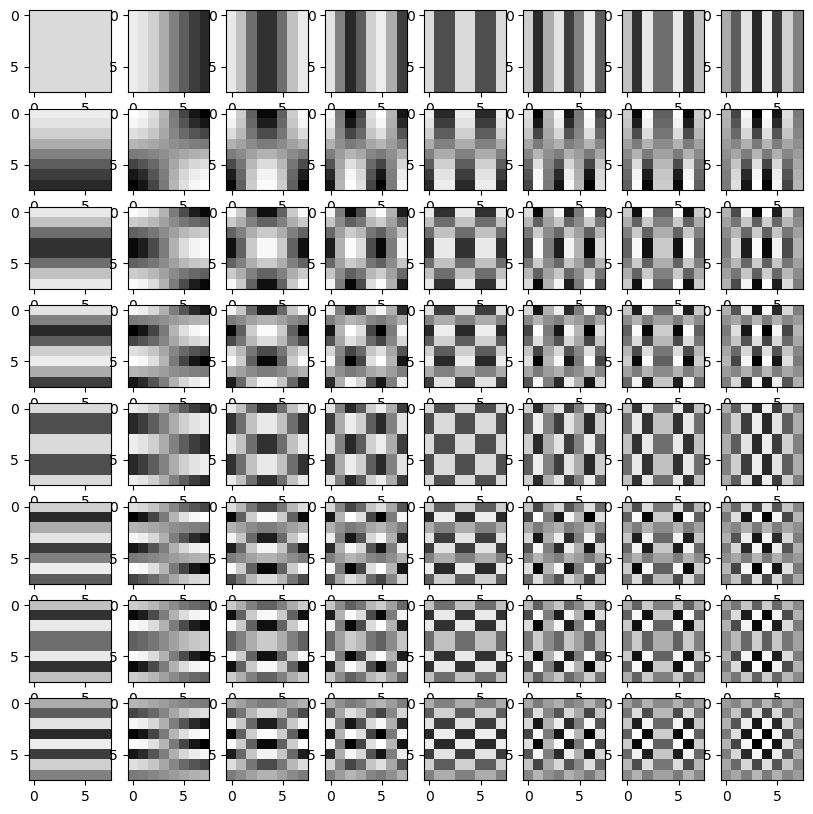

Skalarni proizvod dvije bazne funkcije BF[0][0] i BF[0][3] grafički prikazane ispod je: 0.0000


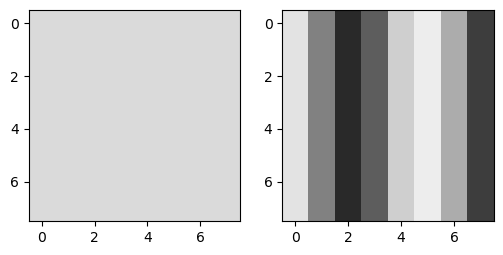

Skalarni proizvod dvije bazne funkcije BF[1][2] i BF[3][5] grafički prikazane ispod je: 0.0000


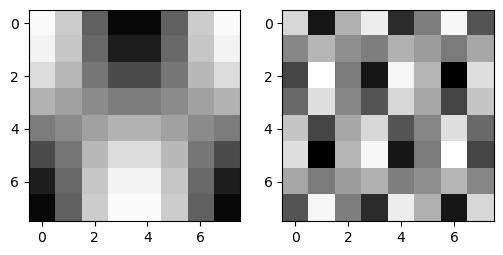

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


BF = DCTBazneFunkcije(8,8)
fig, axs = plt.subplots(8,8,figsize=(10,10))
v0=np.amin(BF)
v1=np.amax(BF)
no = 1
for u in range(0, 8):
    for v in range(0, 8):
        axs[u,v].imshow(BF[u][v], cmap=cm.Greys_r,vmin=v0,vmax=v1)
        no += 1
plt.show()

print("Skalarni proizvod dvije bazne funkcije BF[0][0] i BF[0][3] grafički prikazane ispod je:",format(SP(BF[0][0],BF[0][3],8,8),".4f"))
fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(BF[0][0], cmap=cm.Greys_r,vmin=v0,vmax=v1)
axs[1].imshow(BF[0][3], cmap=cm.Greys_r,vmin=v0,vmax=v1)
plt.show()

print("Skalarni proizvod dvije bazne funkcije BF[1][2] i BF[3][5] grafički prikazane ispod je:",format(SP(BF[1][2],BF[3][5],8,8),".4f"))
fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(BF[1][2], cmap=cm.Greys_r,vmin=v0,vmax=v1)
axs[1].imshow(BF[3][5], cmap=cm.Greys_r,vmin=v0,vmax=v1)
plt.show()

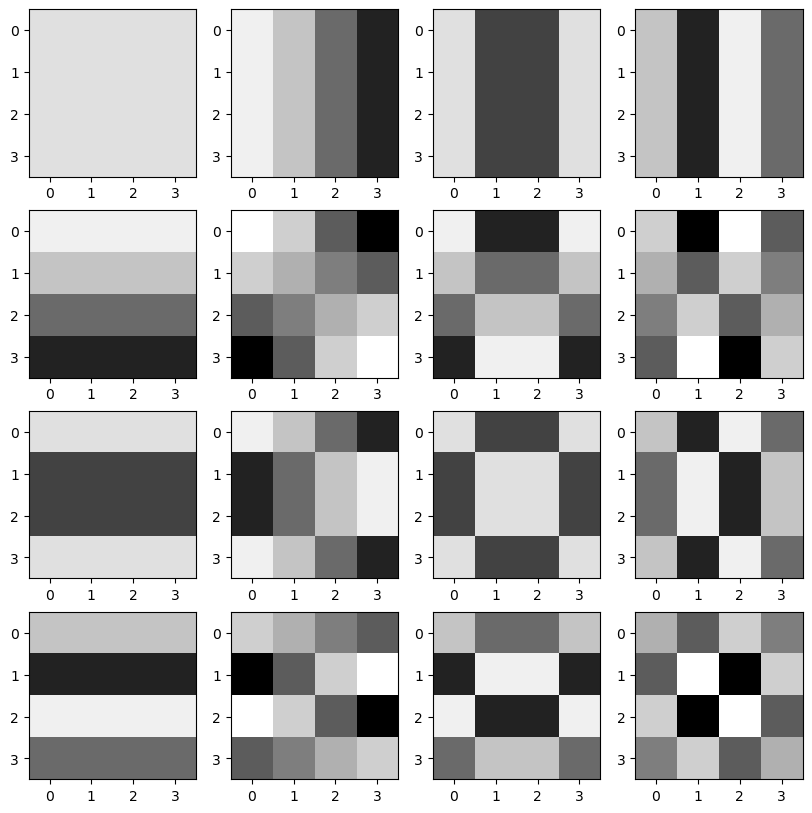

Skalarni proizvod dvije bazne funkcije BF[0][0] i BF[0][3] grafički prikazane ispod je: -0.0000


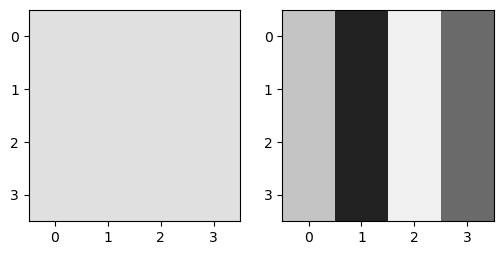

Skalarni proizvod dvije bazne funkcije BF[1][2] i BF[3][5] grafički prikazane ispod je: -0.0000


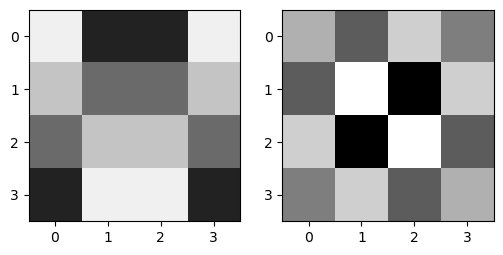

In [18]:
#Dodatni primjeri M=N=4

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


BF = DCTBazneFunkcije(4,4)
fig, axs = plt.subplots(4,4,figsize=(10,10))
v0=np.amin(BF)
v1=np.amax(BF)
no = 1
for u in range(0, 4):
    for v in range(0, 4):
        axs[u,v].imshow(BF[u][v], cmap=cm.Greys_r,vmin=v0,vmax=v1)
        no += 1
plt.show()

print("Skalarni proizvod dvije bazne funkcije BF[0][0] i BF[0][3] grafički prikazane ispod je:",format(SP(BF[0][0],BF[0][3],4,4),".4f"))
fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(BF[0][0], cmap=cm.Greys_r,vmin=v0,vmax=v1)
axs[1].imshow(BF[0][3], cmap=cm.Greys_r,vmin=v0,vmax=v1)
plt.show()

print("Skalarni proizvod dvije bazne funkcije BF[1][2] i BF[3][5] grafički prikazane ispod je:",format(SP(BF[1][2],BF[3][3],4,4),".4f"))
fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(BF[1][2], cmap=cm.Greys_r,vmin=v0,vmax=v1)
axs[1].imshow(BF[3][3], cmap=cm.Greys_r,vmin=v0,vmax=v1)
plt.show()

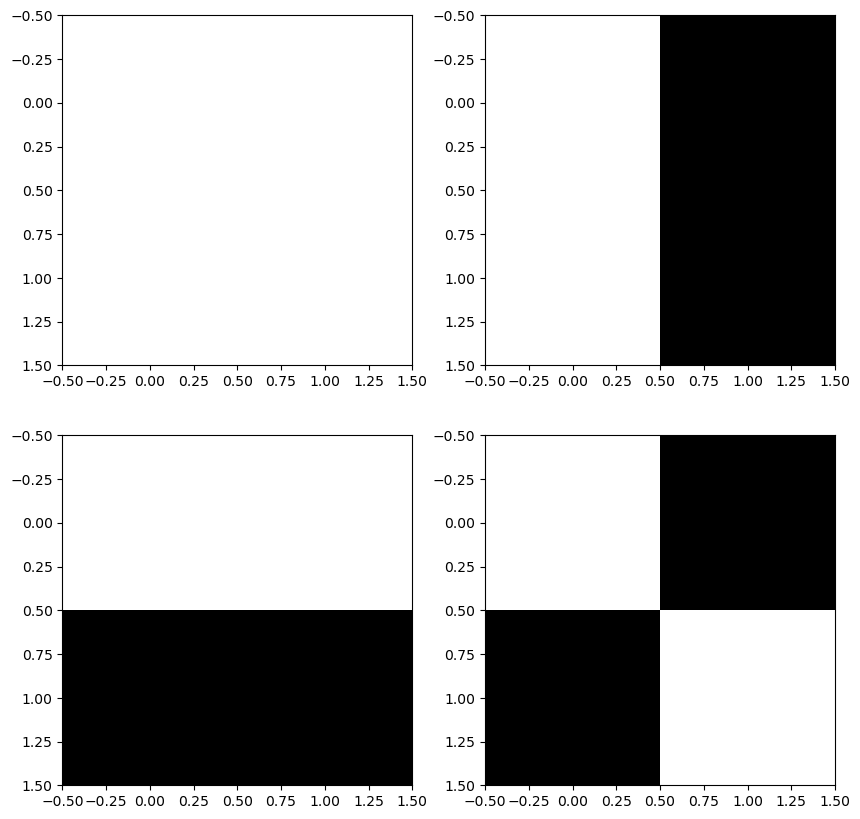

Skalarni proizvod dvije bazne funkcije BF[0][0] i BF[0][3] grafički prikazane ispod je: 0.0000


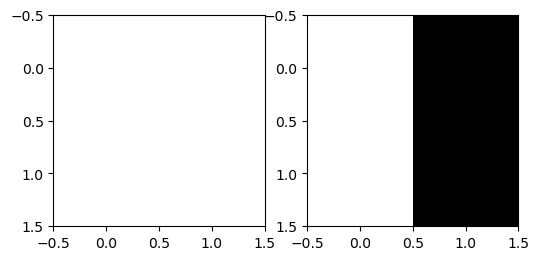

Skalarni proizvod dvije bazne funkcije BF[1][2] i BF[3][5] grafički prikazane ispod je: 1.0000


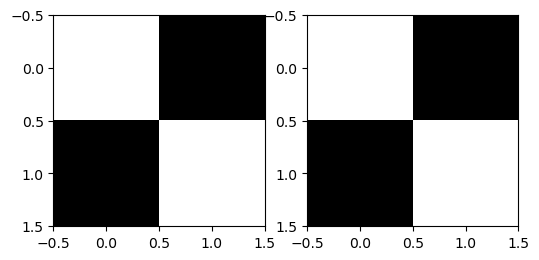

In [19]:
#Dodatni primjeri M=N=2

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


BF = DCTBazneFunkcije(2,2)
fig, axs = plt.subplots(2,2,figsize=(10,10))
v0=np.amin(BF)
v1=np.amax(BF)
no = 1
for u in range(0, 2):
    for v in range(0, 2):
        axs[u,v].imshow(BF[u][v], cmap=cm.Greys_r,vmin=v0,vmax=v1)
        no += 1
plt.show()

print("Skalarni proizvod dvije bazne funkcije BF[0][0] i BF[0][3] grafički prikazane ispod je:",format(SP(BF[0][0],BF[0][1],2,2),".4f"))
fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(BF[0][0], cmap=cm.Greys_r,vmin=v0,vmax=v1)
axs[1].imshow(BF[0][1], cmap=cm.Greys_r,vmin=v0,vmax=v1)
plt.show()

print("Skalarni proizvod dvije bazne funkcije BF[1][2] i BF[3][5] grafički prikazane ispod je:",format(SP(BF[1][1],BF[1][1],2,2),".4f"))
fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(BF[1][1], cmap=cm.Greys_r,vmin=v0,vmax=v1)
axs[1].imshow(BF[1][1], cmap=cm.Greys_r,vmin=v0,vmax=v1)
plt.show()

## PITANJE 1:
Ukratko riječima opišite izgled neke proizvoljne slike kod koje su nakon primijenjene DCT transformacije barem neki DCT koeficijenti koji stoje uz bazne funkcije iz prvog reda (vidjeti prikazanu sliku iznad za slučaj *M*=*N*=8) različiti od nule, dok su svi ostali DCT koeficijenti jednaki nula.   

**Odgovor:**

Kada bi ubacili proizvoljnu sliku, pod ovim uslovima, dešava se promjena intenziteta samo po vertikali.






## PITANJE 2:
U 2-3 rečenice obrazložite zašto se za skalarni proizvod bilo koja dva para baznih funkcija dobiva rezultat 0.  

**Odgovor:**

Skalarni proizvod dvije funkcije koje su okomite je jednak nuli. Skalarni proizvod vektora koji su pod pravim uglom jednak je 0. Pri računanju skalarnog proizvoda, računa se cos(90) što je 0.






